In [1]:
import numpy as np

from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup

In [2]:
# reading wikipedia web page
import requests

source = requests.get('https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City').text
soup = BeautifulSoup(source , 'lxml')

In [3]:
# reading table into dataframe
# after inspecting the webpage, the required table has attrs with class 'wikitable sortable'

import pandas as pd

table = soup.find('table', attrs={'class':'wikitable sortable'})
table_rows = table.find_all('tr')
l = []

for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
    
overall_table = pd.DataFrame(l, columns=["A", "B","C","D","Neighborhoods"]);

In [4]:
neighborhood_table = overall_table[["Neighborhoods"]]
neighborhood_table.head()

#neighborhood_table = pd.DataFrame({"Neighborhoods": overall_table})
#neighborhood_table.head()

Neighborhoods
0                                               None
1                 Melrose, Mott Haven, Port Morris\n
2                            Hunts Point, Longwood\n
3  Claremont, Concourse Village, Crotona Park, Mo...
4               Concourse, Highbridge,  Mount Eden\n

In [5]:
print(neighborhood_table.shape)
neighborhood_table.tail()

(61, 1)


Neighborhoods
56  Arverne, Bayswater, Belle Harbor, Breezy Point...
57  Arlington, Castleton Corners, Clifton, Concord...
58  Arrochar, Bloomfield, Bulls Head, Chelsea, Don...
59  Annadale, Arden Heights, Bay Terrace, Charlest...
60                                                 \n

In [6]:
neighborhood_table2 = neighborhood_table.loc[0:59 , :]
print(neighborhood_table2.tail())

# drop rows that contains all nulls
modified_neighborhood = neighborhood_table2.dropna(axis=0 , how='all');
print (modified_neighborhood.shape)

                                        Neighborhoods
55  Bellerose, Brookville, Cambria Heights, Floral...
56  Arverne, Bayswater, Belle Harbor, Breezy Point...
57  Arlington, Castleton Corners, Clifton, Concord...
58  Arrochar, Bloomfield, Bulls Head, Chelsea, Don...
59  Annadale, Arden Heights, Bay Terrace, Charlest...
(59, 1)


In [7]:
# remove '\n' characters from the dataframe

modified_neighborhood['Neighborhoods'] = modified_neighborhood['Neighborhoods'].str.replace('\n','');
print(modified_neighborhood.tail(15))

                                        Neighborhoods
45       East Elmhurst, Jackson Heights, North Corona
46                                   Corona, Elmhurst
47  Fresh Pond, Glendale, Maspeth, Middle Village,...
48                            Forest Hills, Rego Park
49  Bay Terrace, Beechhurst, College Point, Flushi...
50  Briarwood, Fresh Meadows, Holliswood, Jamaica ...
51  Kew Gardens, Ozone Park, Richmond Hill, Woodhaven
52  Howard Beach, Lindenwood, Richmond Hill, South...
53  Auburndale, Bayside, Douglaston, East Flushing...
54  Baisley Park, Jamaica, Hollis, Rochdale Villag...
55  Bellerose, Brookville, Cambria Heights, Floral...
56  Arverne, Bayswater, Belle Harbor, Breezy Point...
57  Arlington, Castleton Corners, Clifton, Concord...
58  Arrochar, Bloomfield, Bulls Head, Chelsea, Don...
59  Annadale, Arden Heights, Bay Terrace, Charlest...


E:\engineering_programs\Anaconda\anaconda_installation\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, New York, USA'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [9]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

# calling the function to get New York neighborhood coordinations , storing them in new lists using list comprehension
# splitting neighborhood to 4 parts and get coordinations for each part separately to make it computationally easier 
coords1 = [ get_latlng(neighborhood) for neighborhood in modified_neighborhood["Neighborhoods"][:20].tolist() ]

In [10]:
coords2 = [ get_latlng(neighborhood) for neighborhood in modified_neighborhood["Neighborhoods"][20:40].tolist() ]

In [11]:
coords3 = [ get_latlng(neighborhood) for neighborhood in modified_neighborhood["Neighborhoods"][40:50].tolist() ]

In [12]:
coords4 = [ get_latlng(neighborhood) for neighborhood in modified_neighborhood["Neighborhoods"][50:55].tolist() ]

In [13]:
#coords5 = [ get_latlng(neighborhood) for neighborhood in modified_neighborhood["Neighborhoods"][55:].tolist() ]

In [14]:
type(coords1)

list

In [15]:
final_lat_long_list = coords1 + coords2 + coords3 + coords4
print(np.shape(final_lat_long_list))
#print(final_lat_long_list)

(55, 2)


In [16]:
#Converting the lat_long list to dataframe
final_lat_long = pd.DataFrame(final_lat_long_list)
print(final_lat_long.shape)
headers = ("Latitude","Longitude")
final_lat_long.columns = headers
print(final_lat_long.head())

# Removing the last four rows from neighborhood as it is too long and hard to get its coords
removed_long_neighbors = modified_neighborhood.loc[0:55 , :]
print(removed_long_neighbors.shape)
#removed_long_neighbors.tail()

(55, 2)
    Latitude  Longitude
0  40.819900 -73.910380
1  40.812420 -73.884500
2  40.835135 -73.894649
3  40.842351 -73.930896
4  40.854730 -73.911320
(55, 1)


In [17]:
# Concatinating Latitude and Longitude columns to the neighborhoud dataframe

Latitude = final_lat_long.iloc[:,0];
Longitude = final_lat_long.iloc[:,1];


Latitude.reset_index(drop=True, inplace=True)
Longitude.reset_index(drop=True, inplace=True)
removed_long_neighbors.reset_index(drop=True, inplace=True)


final_neighborhood = pd.concat([removed_long_neighbors,Latitude,Longitude], axis=1);
final_neighborhood.head()

Neighborhoods   Latitude  Longitude
0                   Melrose, Mott Haven, Port Morris  40.819900 -73.910380
1                              Hunts Point, Longwood  40.812420 -73.884500
2  Claremont, Concourse Village, Crotona Park, Mo...  40.835135 -73.894649
3                              Concourse, Highbridge  40.842351 -73.930896
4  Fordham, Morris Heights, Mount Hope, Universit...  40.854730 -73.911320

## drawing the map of New York

In [18]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'New York'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [19]:
# create map of New York using latitude and longitude values

import folium # map rendering library

New_York_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng , neighborhood in zip(final_neighborhood['Latitude'], final_neighborhood['Longitude'], final_neighborhood['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(New_York_map)  
    
New_York_map

## Use the Foursquare API to explore the neighborhoods

In [20]:
# define Foursquare Credentials and Version
# credentials from https://foursquare.com/developers/apps/XSCQCOQYVFAKW0TD15RUBVT43VAF1IM3LJQUCH4OD3GVH02K/settings

CLIENT_ID = 'XXXXXXXXXX' # my Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [21]:
# Now, let's get the top 100 venues (any place that contains an activity .. Starbucks for example) ..
# that are within a radius of 500 meters.

radius = 500
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(final_neighborhood['Latitude'], final_neighborhood['Longitude'], final_neighborhood['Neighborhoods']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]["items"]
    
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [22]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(2006, 7)


Neighborhood  Latitude  Longitude  \
0  Melrose, Mott Haven, Port Morris   40.8199  -73.91038   
1  Melrose, Mott Haven, Port Morris   40.8199  -73.91038   
2  Melrose, Mott Haven, Port Morris   40.8199  -73.91038   
3  Melrose, Mott Haven, Port Morris   40.8199  -73.91038   
4  Melrose, Mott Haven, Port Morris   40.8199  -73.91038   

                          VenueName  VenueLatitude  VenueLongitude  \
0                     Blink Fitness      40.819348      -73.910373   
1  Senshi Okami Martial Arts Center      40.819295      -73.914158   
2               Landin Mac & Cheese      40.820028      -73.915886   
3                Perry Coffee Shop.      40.823181      -73.910928   
4                     Blink Fitness      40.819470      -73.910522   

          VenueCategory  
0  Gym / Fitness Center  
1     Martial Arts Dojo  
2    Mac & Cheese Joint  
3                 Diner  
4                   Gym

In [23]:
# Let's find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))
venues_df['VenueCategory'].unique()[:50]

There are 296 uniques categories.


array(['Gym / Fitness Center', 'Martial Arts Dojo', 'Mac & Cheese Joint',
       'Diner', 'Gym', 'Donut Shop', 'Italian Restaurant', 'Supermarket',
       'Clothing Store', 'Art Gallery', 'Mexican Restaurant',
       'Sandwich Place', 'Mobile Phone Shop', 'Pizza Place',
       'Discount Store', 'Supplement Shop', 'Pharmacy',
       'Paper / Office Supplies Store', 'Grocery Store',
       'Department Store', 'Spa', 'Bus Station', 'Intersection',
       'Juice Bar', 'Spanish Restaurant', 'BBQ Joint', 'Bank',
       'Farmers Market', 'Restaurant', 'Chinese Restaurant',
       'Waste Facility', 'Park', 'Laundromat', 'Bridge', 'Historic Site',
       'Food Truck', 'College Rec Center', 'Skate Park',
       'African Restaurant', 'Wings Joint', 'Latin American Restaurant',
       'Bakery', 'Shoe Store', 'Fast Food Restaurant', 'Deli / Bodega',
       'Burger Joint', 'Fried Chicken Joint', 'Metro Station',
       'Convenience Store', 'Athletics & Sports'], dtype=object)

In [24]:
# Viewing all distinct Venues Categories 
new_york_value_counts = pd.DataFrame(venues_df['VenueCategory'].value_counts());
new_york_value_counts['VenueCategory1'] = new_york_value_counts.index
new_york_value_counts.columns = ["count" , "VenueCategory"]
print(new_york_value_counts.shape)
new_york_value_counts

(296, 2)


count              VenueCategory
Pizza Place                   80                Pizza Place
Bar                           63                        Bar
Coffee Shop                   58                Coffee Shop
Deli / Bodega                 53              Deli / Bodega
Bakery                        52                     Bakery
Mexican Restaurant            47         Mexican Restaurant
Chinese Restaurant            40         Chinese Restaurant
Café                          40                       Café
Italian Restaurant            39         Italian Restaurant
Sandwich Place                37             Sandwich Place
Donut Shop                    37                 Donut Shop
American Restaurant           36        American Restaurant
Grocery Store                 35              Grocery Store
Caribbean Restaurant          33       Caribbean Restaurant
Park                          33                       Park
Pharmacy                      30                   Pharmacy
Bank                          30                       Bank
Cocktail Bar                  28               Cocktail Bar
Gym                           26                        Gym
Ice Cream Shop                24             Ice Cream Shop
Mobile Phone Shop             22          Mobile Phone Shop
Supermarket                   21                Supermarket
Thai Restaurant               20            Thai Restaurant
Fast Food Restaurant          19       Fast Food Restaurant
Hotel                         19                      Hotel
Fried Chicken Joint           19        Fried Chicken Joint
Wine Shop                     19                  Wine Shop
Yoga Studio                   19                Yoga Studio
Latin American Restaurant     19  Latin American Restaurant
Japanese Restaurant           18        Japanese Restaurant
...                          ...                        ...
Check Cashing Service          1      Check Cashing Service
Church                         1                     Church
Video Store                    1                Video Store
Arcade                         1                     Arcade
Candy Store                    1                Candy Store
Paella Restaurant              1          Paella Restaurant
Turkish Restaurant             1         Turkish Restaurant
Tiki Bar                       1                   Tiki Bar
Smoothie Shop                  1              Smoothie Shop
Opera House                    1                Opera House
Post Office                    1                Post Office
Big Box Store                  1              Big Box Store
Pier                           1                       Pier
Soup Place                     1                 Soup Place
Field                          1                      Field
Dry Cleaner                    1                Dry Cleaner
Tech Startup                   1               Tech Startup
Chocolate Shop                 1             Chocolate Shop
Comedy Club                    1                Comedy Club
Pet Café                       1                   Pet Café
Metro Station                  1              Metro Station
Port                           1                       Port
Storage Facility               1           Storage Facility
Moroccan Restaurant            1        Moroccan Restaurant
Street Art                     1                 Street Art
Salad Place                    1                Salad Place
Laundromat                     1                 Laundromat
College Arts Building          1      College Arts Building
Szechuan Restaurant            1        Szechuan Restaurant
Waste Facility                 1             Waste Facility

[296 rows x 2 columns]

## Grouping venues types together

Let's group all similar veneues types together to get insight about the total number of each category in New York city

#### Restaurants :

In [25]:
# getting all rows that the venue type contain the word restaurant
print('number of values contains restaurant word =' , len(new_york_value_counts[new_york_value_counts['VenueCategory'].str.contains('Restaurant')]))
new_york_restaurants = new_york_value_counts[new_york_value_counts['VenueCategory'].str.contains('Restaurant')]["count"].sum()
print('count of all restaurant = ' , new_york_restaurants)

# remove all venues containing 'restaurant'
new_york_final_counts = new_york_value_counts.drop(
    new_york_value_counts[new_york_value_counts['VenueCategory'].str.contains('Restaurant')].index, inplace = False)
print(new_york_final_counts.shape)
new_york_final_counts

# adding restaurant row containing the final count of all restaurants
#new_york_final_counts.append({'count':new_york_restaurants , 'VenueCategory':'Restaurants'}, ignore_index=True)
new_york_final_counts.loc['Restaurants'] = (new_york_restaurants , 'Restaurants')

print(new_york_final_counts.shape)
#new_york_final_counts

number of values contains restaurant word = 58
count of all restaurant =  489
(238, 2)
(239, 2)


#### Other food places

In [26]:
print('number of other food places =' , len(new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
    ('Pizza|Sandwich|Chicken|Food|Burger|Diner|Deli|Steakhouse|Joint|Taco|Buffet|Breakfast|Snack|Soup|Gastropub|Burrito')]))
new_york_food_places = new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
    ('Pizza|Sandwich|Chicken|Food|Burger|Diner|Deli|Steakhouse|Joint|Taco|Buffet|Breakfast|Snack|Soup|Gastropub|Burrito')]["count"].sum()
print('count of other food places = ' , new_york_food_places)

# remove all venues containing these words
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
    ('Pizza|Sandwich|Chicken|Food|Burger|Diner|Deli|Steakhouse|Joint|Taco|Buffet|Breakfast|Snack|Soup|Gastropub|Burrito')
                         ].index, inplace = False)
print(new_york_final_counts.shape)

#update restaurants count
new_york_final_counts.loc[new_york_final_counts['VenueCategory'] == 'Restaurants', ['count']] = new_york_restaurants + new_york_food_places

print(new_york_final_counts.shape)
#new_york_final_counts

number of other food places = 23
count of other food places =  296
(216, 2)
(216, 2)


#### Bars :

In [27]:
print('number of Bars =' , len(new_york_final_counts[new_york_final_counts['VenueCategory']
                                                .str.contains('Bar|pub|Nightclub|Pub')]))
new_york_Bars = new_york_final_counts[new_york_final_counts['VenueCategory']
                                             .str.contains('Bar|pub|Nightclub|Pub')]["count"].sum()
print('count of Bars = ' , new_york_Bars)

# remove all venues containing 'restaurant'
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains('Bar|pub|Nightclub|Pub')].index, inplace = False)
print(new_york_final_counts.shape)

# adding new row for Bars
new_york_final_counts.loc['Bars'] = (new_york_Bars , 'Bars')

print(new_york_final_counts.shape)
#new_york_final_counts

number of Bars = 18
count of Bars =  162
(198, 2)
(199, 2)


#### Shopping and shops :

In [28]:
print('number of shops =' , len(new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
    ('Shop|Shopping|Bakery|Store|Boutique|Pharmacy|Supermarket|Market|Salad|Butcher|Cleaner|Bookstore|Laundromat|Grocery|Auto|Car')]))
new_york_Shops = new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
    ('Shop|Shopping|Bakery|Store|Boutique|Pharmacy|Supermarket|Market|Salad|Butcher|Cleaner|Bookstore|Laundromat|Grocery|Auto|Car')]["count"].sum()
print('count of shops = ' , new_york_Shops)

# remove all venues containing these words
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
    ('Shop|Shopping|Bakery|Store|Boutique|Pharmacy|Supermarket|Market|Salad|Butcher|Cleaner|Bookstore|Laundromat|Grocery|Auto|Car')].index, inplace = False)
print(new_york_final_counts.shape)

# adding new row for Shops
new_york_final_counts.loc['Shops'] = (new_york_Shops , 'Shops')

print(new_york_final_counts.shape)
#new_york_final_counts

number of shops = 78
count of shops =  570
(121, 2)
(122, 2)


#### Fitness and sports :

In [29]:
print('number of fitness places =' , len(new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                            ('Gym|Spa|Basketball|Yoga|Playground|Martial|Sports|Bike|Tennis')]))
new_york_fitness_places = new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                            ('Gym|Spa|Basketball|Yoga|Playground|Martial|Sports|Bike|Tennis')]["count"].sum()
print('count of fitness places = ' , new_york_fitness_places)

# remove all venues containing these words
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                          ('Gym|Spa|Basketball|Yoga|Playground|Martial|Sports|Bike|Tennis')].index, inplace = False)
print(new_york_final_counts.shape)

# adding new row for fitness places
new_york_final_counts.loc['Fitness & sports'] = (new_york_fitness_places , 'Fitness & sports')

print(new_york_final_counts.shape)
#new_york_final_counts

number of fitness places = 16
count of fitness places =  115
(106, 2)
(107, 2)


#### Entertainment

In [30]:
print('number of entertaining places =' , len(new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
    ('Circus|Club|Opera|Fountain|Arcade|Pier|Pool|Boat|Gallery|Boutique|Art|Arts|Theater|Hall|Plaza|Dance|Entertainment|Music|Bowling|Golf|Beach')]))
new_york_entertaining_places = new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
    ('Circus|Club|Opera|Fountain|Arcade|Pier|Pool|Boat|Gallery|Boutique|Art|Arts|Theater|Hall|Plaza|Dance|Entertainment|Music|Bowling|Golf|Beach')]["count"].sum()
print('count of entertaining places = ' , new_york_entertaining_places)

# remove all venues containing these words
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
    ('Circus|Club|Opera|Fountain|Arcade|Pier|Pool|Boat|Gallery|Boutique|Art|Arts|Theater|Hall|Plaza|Dance|Entertainment|Music|Bowling|Golf|Beach')].index, inplace = False)
print(new_york_final_counts.shape)

# adding new row for entertaining places
new_york_final_counts.loc['entertaining places'] = (new_york_entertaining_places , 'entertaining places')

print(new_york_final_counts.shape)
#new_york_final_counts

number of entertaining places = 31
count of entertaining places =  104
(76, 2)
(77, 2)


#### Hotels :

In [31]:
print('number of Hotels =' , len(new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                                    ('Hotel|Motel|Hostel|Lounge')]))
new_york_Hotels = new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                                    ('Hotel|Motel|Hostel|Lounge')]["count"].sum()
print('count of Hotels = ' , new_york_Hotels)

# remove all venues containing these words
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                          ('Hotel|Motel|Hostel|Lounge')].index, inplace = False)
print(new_york_final_counts.shape)

# adding new row for Hotels
new_york_final_counts.loc['Hotels'] = (new_york_Hotels , 'Hotels')

print(new_york_final_counts.shape)
#new_york_final_counts

number of Hotels = 6
count of Hotels =  35
(71, 2)
(72, 2)


#### Coffee and Tea shops

In [32]:
print('number of Coffee shops =' , len(new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                                    ('Coffee|Café|Tea|Bistro')]))
new_york_Cafe = new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                                    ('Coffee|Café|Tea|Bistro')]["count"].sum()
print('count of Coffee shops = ' , new_york_Cafe)

# remove all venues containing these words
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                          ('Coffee|Café|Tea|Bistro')].index, inplace = False)
print(new_york_final_counts.shape)

# adding new row for coffee and tea shops
new_york_final_counts.loc['Coffee shops'] = (new_york_Cafe , 'Coffee shops')

print(new_york_final_counts.shape)
#new_york_final_counts

number of Coffee shops = 4
count of Coffee shops =  44
(68, 2)
(69, 2)


#### Green places :

In [33]:
print('number of Green places =' , len(new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                                    ('Park|Garden|Field|Farm')]))
new_york_Green_Places = new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                                    ('Park|Garden|Field|Farm')]["count"].sum()
print('count of Green places = ' , new_york_Green_Places)

# remove all venues containing these words
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                          ('Park|Garden|Field|Farm')].index, inplace = False)
print(new_york_final_counts.shape)

# adding new row for coffee and tea shops
new_york_final_counts.loc['Green places'] = (new_york_Green_Places , 'Green places')

print(new_york_final_counts.shape)
#new_york_final_counts

number of Green places = 7
count of Green places =  49
(62, 2)
(63, 2)


#### Transportation Spaces :

In [34]:
print('number of Transportion Spaces = ' , len(new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                                    ('Bus|Station|Bridge|Heliport|Intersection|Airport|Trail')]))
new_york_Transportion_stations = new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                                    ('Bus|Station|Bridge|Heliport|Intersection|Airport|Trail')]["count"].sum()
print('count of Transportion Spaces = ' , new_york_Transportion_stations)

# remove all venues containing these words
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                          ('Bus|Station|Bridge|Heliport|Intersection|Airport|Trail')].index, inplace = False)
print(new_york_final_counts.shape)

# adding new row for coffee and tea shops
new_york_final_counts.loc['Transportion Spaces'] = (new_york_Transportion_stations , 'Transportion Spaces')

print(new_york_final_counts.shape)
#new_york_final_counts

number of Transportion Spaces =  13
count of Transportion Spaces =  31
(50, 2)
(51, 2)


#### tourism places

In [35]:
print('number of tourism places =' , len(new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                                    ('Museum|Temple|Landmark|Scenic|Historic')]))
new_york_tourism_places = new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                                    ('Museum|Temple|Landmark|Scenic|Historic')]["count"].sum()
print('count of tourism places = ' , new_york_tourism_places)

# remove all venues containing these words
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts['VenueCategory'].str.contains
                          ('Museum|Temple|Landmark|Scenic|Historic')].index, inplace = False)
print(new_york_final_counts.shape)

# adding new row for coffee and tea shops
new_york_final_counts.loc['tourism places'] = (new_york_tourism_places , 'tourism places')

print(new_york_final_counts.shape)
new_york_final_counts

number of tourism places = 6
count of tourism places =  18
(45, 2)
(46, 2)


count  \
Bank                                         30   
Speakeasy                                     6   
Nail Salon                                    6   
Platform                                      5   
Residential Building (Apartment / Condo)      4   
Health & Beauty Service                       3   
Cycle Studio                                  3   
Animal Shelter                                2   
Moving Target                                 2   
Library                                       2   
Train                                         2   
Dog Run                                       2   
Brewery                                       2   
School                                        2   
Factory                                       1   
High School                                   1   
Other Great Outdoors                          1   
Recreation Center                             1   
Lawyer                                        1   
General Travel                                1   
Home Service                                  1   
Multiplex                                     1   
College Rec Center                            1   
Newsstand                                     1   
Doctor's Office                               1   
Office                                        1   
Creperie                                      1   
Harbor / Marina                               1   
Medical School                                1   
Check Cashing Service                         1   
Church                                        1   
Post Office                                   1   
Tech Startup                                  1   
Port                                          1   
Storage Facility                              1   
Waste Facility                                1   
Restaurants                                 785   
Bars                                        162   
Shops                                       570   
Fitness & sports                            115   
entertaining places                         104   
Hotels                                       35   
Coffee shops                                 44   
Green places                                 49   
Transportion Spaces                          31   
tourism places                               18   

                                                                     VenueCategory  
Bank                                                                          Bank  
Speakeasy                                                                Speakeasy  
Nail Salon                                                              Nail Salon  
Platform                                                                  Platform  
Residential Building (Apartment / Condo)  Residential Building (Apartment / Condo)  
Health & Beauty Service                                    Health & Beauty Service  
Cycle Studio                                                          Cycle Studio  
Animal Shelter                                                      Animal Shelter  
Moving Target                                                        Moving Target  
Library                                                                    Library  
Train                                                                        Train  
Dog Run                                                                    Dog Run  
Brewery                                                                    Brewery  
School                                                                      School  
Factory                                                                    Factory  
High School                                                            High School  
Other Great Outdoors                                          Other Great Outdoors  
Recreation Center                                                Recreation Center  
Lawyer                       

#### Remaining venues :

In [36]:
print('number of Other venues =' , len(new_york_final_counts[new_york_final_counts["count"] < 18]))
new_york_other_venues = new_york_final_counts[new_york_final_counts["count"] < 18]["count"].sum()
print('count of Other venues = ' , new_york_other_venues)

# remove all venues containing these words 
new_york_final_counts = new_york_final_counts.drop(
    new_york_final_counts[new_york_final_counts["count"] < 18].index, inplace = False)
print(new_york_final_counts.shape)

# adding new row for coffee and tea shops
new_york_final_counts.loc['Other venues'] = (new_york_other_venues , 'Other venues')

#print(new_york_final_counts.shape)
new_york_final_counts

number of Other venues = 35
count of Other venues =  63
(11, 2)


count        VenueCategory
Bank                    30                 Bank
Restaurants            785          Restaurants
Bars                   162                 Bars
Shops                  570                Shops
Fitness & sports       115     Fitness & sports
entertaining places    104  entertaining places
Hotels                  35               Hotels
Coffee shops            44         Coffee shops
Green places            49         Green places
Transportion Spaces     31  Transportion Spaces
tourism places          18       tourism places
Other venues            63         Other venues

We can rely on the table above to make observations about the nature of New York city.

# Toronto venues dataframe

Let's make the same steps on Toronto neibourhood data to compare between the Two cities.

In [37]:
# Import toronto venues dataframe

toronto_venues_df = pd.read_csv('Toronto_venues_df.csv', index_col=0 , encoding='latin1')
print(toronto_venues_df.shape)
toronto_venues_df.head()

(1615, 9)


PostalCode       Borough                  Neighborhood  BoroughLatitude  \
0        M4E  East Toronto                   The Beaches        43.676357   
1        M4E  East Toronto                   The Beaches        43.676357   
2        M4E  East Toronto                   The Beaches        43.676357   
3        M4E  East Toronto                   The Beaches        43.676357   
4        M4K  East Toronto  The Danforth West, Riverdale        43.679557   

   BoroughLongitude                           VenueName  VenueLatitude  \
0        -79.293031                   Glen Manor Ravine      43.676821   
1        -79.293031  The Big Carrot Natural Food Market      43.678879   
2        -79.293031                 Grover Pub and Grub      43.679181   
3        -79.293031                       Upper Beaches      43.680563   
4        -79.352188                       MenEssentials      43.677820   

   VenueLongitude      VenueCategory  
0      -79.293942              Trail  
1      -79.297734  Health Food Store  
2      -79.297215                Pub  
3      -79.292869       Neighborhood  
4      -79.351265     Cosmetics Shop

In [38]:
toronto_value_counts = pd.DataFrame(toronto_venues_df['VenueCategory'].value_counts());
print(toronto_value_counts.shape)
toronto_value_counts

(236, 1)


VenueCategory
Coffee Shop                              142
Café                                      89
Restaurant                                56
Italian Restaurant                        41
Hotel                                     35
Park                                      35
Japanese Restaurant                       33
Bakery                                    32
Sushi Restaurant                          26
Bar                                       26
Pizza Place                               25
Pub                                       24
Gym                                       24
Sandwich Place                            23
Clothing Store                            21
American Restaurant                       21
Seafood Restaurant                        21
Beer Bar                                  18
Breakfast Spot                            18
Thai Restaurant                           17
Bookstore                                 17
Gastropub                                 17
Vegetarian / Vegan Restaurant             17
Ice Cream Shop                            16
Grocery Store                             16
Diner                                     16
Deli / Bodega                             15
Cocktail Bar                              14
Theater                                   14
Yoga Studio                               13
...                                      ...
College Gym                                1
Noodle House                               1
Snack Place                                1
Hookah Bar                                 1
Toy / Game Store                           1
Home Service                               1
Tanning Salon                              1
College Auditorium                         1
Chocolate Shop                             1
German Restaurant                          1
Baby Store                                 1
Auto Workshop                              1
Hotel Bar                                  1
Optical Shop                               1
Malay Restaurant                           1
Frozen Yogurt Shop                         1
Doner Restaurant                           1
Convention Center                          1
Stationery Store                           1
Mac & Cheese Joint                         1
Boat or Ferry                              1
Sake Bar                                   1
Athletics & Sports                         1
Taiwanese Restaurant                       1
Theme Restaurant                           1
Fruit & Vegetable Store                    1
Other Great Outdoors                       1
Organic Grocery                            1
Strip Club                                 1
Candy Store                                1

[236 rows x 1 columns]

In [39]:
toronto_value_counts['VenueCategory1'] = toronto_value_counts.index
toronto_value_counts.columns = ["count" , "VenueCategory"]
print(toronto_value_counts.shape)
toronto_value_counts

(236, 2)


count                  VenueCategory
Coffee Shop                      142                    Coffee Shop
Café                              89                           Café
Restaurant                        56                     Restaurant
Italian Restaurant                41             Italian Restaurant
Hotel                             35                          Hotel
Park                              35                           Park
Japanese Restaurant               33            Japanese Restaurant
Bakery                            32                         Bakery
Sushi Restaurant                  26               Sushi Restaurant
Bar                               26                            Bar
Pizza Place                       25                    Pizza Place
Pub                               24                            Pub
Gym                               24                            Gym
Sandwich Place                    23                 Sandwich Place
Clothing Store                    21                 Clothing Store
American Restaurant               21            American Restaurant
Seafood Restaurant                21             Seafood Restaurant
Beer Bar                          18                       Beer Bar
Breakfast Spot                    18                 Breakfast Spot
Thai Restaurant                   17                Thai Restaurant
Bookstore                         17                      Bookstore
Gastropub                         17                      Gastropub
Vegetarian / Vegan Restaurant     17  Vegetarian / Vegan Restaurant
Ice Cream Shop                    16                 Ice Cream Shop
Grocery Store                     16                  Grocery Store
Diner                             16                          Diner
Deli / Bodega                     15                  Deli / Bodega
Cocktail Bar                      14                   Cocktail Bar
Theater                           14                        Theater
Yoga Studio                       13                    Yoga Studio
...                              ...                            ...
College Gym                        1                    College Gym
Noodle House                       1                   Noodle House
Snack Place                        1                    Snack Place
Hookah Bar                         1                     Hookah Bar
Toy / Game Store                   1               Toy / Game Store
Home Service                       1                   Home Service
Tanning Salon                      1                  Tanning Salon
College Auditorium                 1             College Auditorium
Chocolate Shop                     1                 Chocolate Shop
German Restaurant                  1              German Restaurant
Baby Store                         1                     Baby Store
Auto Workshop                      1                  Auto Workshop
Hotel Bar                          1                      Hotel Bar
Optical Shop                       1                   Optical Shop
Malay Restaurant                   1               Malay Restaurant
Frozen Yogurt Shop                 1             Frozen Yogurt Shop
Doner Restaurant                   1               Doner Restaurant
Convention Center                  1              Convention Center
Stationery Store                   1               Stationery Store
Mac & Cheese Joint                 1             Mac & Cheese Joint
Boat or Ferry                      1                  Boat or Ferry
Sake Bar                           1                       Sake Bar
Athletics & Sports                 1             Athletics & Sports
Taiwanese Restaurant               1           Taiwanese Restaurant
Theme Restaurant                   1               Theme Restaurant
Fruit & Vegetable Store            1        Fruit & Vegetable Store
Other Great Outdoors               1           Other Great Outdoors
Organic Grocery    

## Grouping venues types together

#### Restaurants

In [40]:
# getting all rows that the venue type contain the word restaurant
print('number of values contains restaurant word =' , len(toronto_value_counts[toronto_value_counts['VenueCategory'].str.contains('Restaurant')]))
Toronto_restaurants = toronto_value_counts[toronto_value_counts['VenueCategory'].str.contains('Restaurant')]["count"].sum()
print('count of all restaurant = ' , Toronto_restaurants)

# remove all venues containing 'restaurant'
Toronto_final_counts = toronto_value_counts.drop(
    toronto_value_counts[toronto_value_counts['VenueCategory'].str.contains('Restaurant')].index, inplace = False)
print(Toronto_final_counts.shape)

# adding restaurant row containing the final count of all restaurants
Toronto_final_counts.loc['Restaurants'] = (Toronto_restaurants , 'Restaurants')

print(Toronto_final_counts.shape)
#new_york_final_counts

number of values contains restaurant word = 44
count of all restaurant =  385
(192, 2)
(193, 2)


#### Other food places :

In [41]:
print('number of other food places =' , len(Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
    ('Pizza|Sandwich|Chicken|Food|Burger|Diner|Deli|Steakhouse|Joint|Taco|Buffet|Breakfast|Snack|Soup|Gastropub|poke|Burrito|Creperie|Noodle')]))
Toronto_food_places = Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
    ('Pizza|Sandwich|Chicken|Food|Burger|Diner|Deli|Steakhouse|Joint|Taco|Buffet|Breakfast|Snack|Soup|Gastropub|poke|Burrito|Creperie|Noodle')]["count"].sum()
print('count of other food places = ' , Toronto_food_places)

# remove all venues containing these words
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
    ('Pizza|Sandwich|Chicken|Food|Burger|Diner|Deli|Steakhouse|Joint|Taco|Buffet|Breakfast|Snack|Soup|Gastropub|poke|Burrito|Creperie|Noodle')
                         ].index, inplace = False)
print(Toronto_final_counts.shape)

#update restaurants count
Toronto_final_counts.loc[Toronto_final_counts['VenueCategory'] == 'Restaurants', ['count']] = Toronto_restaurants + Toronto_food_places

print(Toronto_final_counts.shape)
#new_york_final_counts

number of other food places = 24
count of other food places =  187
(169, 2)
(169, 2)


#### Bars :

In [42]:
print('number of Bars =' , len(Toronto_final_counts[Toronto_final_counts['VenueCategory']
                                                .str.contains('Bar|pub|Nightclub|Pub')]))
Toronto_Bars = Toronto_final_counts[Toronto_final_counts['VenueCategory']
                                             .str.contains('Bar|pub|Nightclub|Pub')]["count"].sum()
print('count of Bars = ' , Toronto_Bars)

# remove all venues containing 'restaurant'
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains('Bar|pub|Nightclub|Pub')].index, inplace = False)
print(Toronto_final_counts.shape)

# adding new row for Bars
Toronto_final_counts.loc['Bars'] = (Toronto_Bars , 'Bars')

print(Toronto_final_counts.shape)
#new_york_final_counts

number of Bars = 14
count of Bars =  117
(155, 2)
(156, 2)


#### Shopping and shops :

In [43]:
print('number of shops =' , len(Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
    ('Shop|Shopping|Bakery|Store|Boutique|Pharmacy|Supermarket|Market|Salad|Butcher|Cleaner|Bookstore|Laundromat|Grocery|Auto|Car')]))
Toronto_Shops = Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
    ('Shop|Shopping|Bakery|Store|Boutique|Pharmacy|Supermarket|Market|Salad|Butcher|Cleaner|Bookstore|Laundromat|Grocery|Auto|Car')]["count"].sum()
print('count of shops = ' , Toronto_Shops)

# remove all venues containing these words
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
    ('Shop|Shopping|Bakery|Store|Boutique|Pharmacy|Supermarket|Market|Salad|Butcher|Cleaner|Bookstore|Laundromat|Grocery|Auto|Car')].index, inplace = False)
print(Toronto_final_counts.shape)

# adding new row for Shops
Toronto_final_counts.loc['Shops'] = (Toronto_Shops , 'Shops')

print(Toronto_final_counts.shape)
#new_york_final_counts

number of shops = 65
count of shops =  466
(91, 2)
(92, 2)


#### Fitness and sports :

In [44]:
print('number of fitness places =' , len(Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                            ('Gym|Spa|Basketball|Yoga|Playground|Martial|Sports|Bike|Tennis|Stadium')]))
Toronto_fitness_places = Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                            ('Gym|Spa|Basketball|Yoga|Playground|Martial|Sports|Bike|Tennis|Stadium')]["count"].sum()
print('count of fitness places = ' , Toronto_fitness_places)

# remove all venues containing these words
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                          ('Gym|Spa|Basketball|Yoga|Playground|Martial|Sports|Bike|Tennis|Stadium')].index, inplace = False)
print(Toronto_final_counts.shape)

# adding new row for fitness places
Toronto_final_counts.loc['Fitness & sports'] = (Toronto_fitness_places , 'Fitness & sports')

print(Toronto_final_counts.shape)
#new_york_final_counts

number of fitness places = 14
count of fitness places =  70
(78, 2)
(79, 2)


#### Entertainment :

In [45]:
print('number of entertaining places =' , len(Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
    ('Circus|Club|Opera|Fountain|Arcade|Pier|Pool|Boat|Gallery|Boutique|Art|Arts|Theater|Hall|Plaza|Dance|Entertainment|Music|Bowling|Golf|Beach|Skating')]))
Toronto_entertaining_places = Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
    ('Circus|Club|Opera|Fountain|Arcade|Pier|Pool|Boat|Gallery|Boutique|Art|Arts|Theater|Hall|Plaza|Dance|Entertainment|Music|Bowling|Golf|Beach|Skating')]["count"].sum()
print('count of entertaining places = ' , Toronto_entertaining_places)

# remove all venues containing these words
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
    ('Circus|Club|Opera|Fountain|Arcade|Pier|Pool|Boat|Gallery|Boutique|Art|Arts|Theater|Hall|Plaza|Dance|Entertainment|Music|Bowling|Golf|Beach|Skating')].index, inplace = False)
print(Toronto_final_counts.shape)

# adding new row for entertaining places
Toronto_final_counts.loc['entertaining places'] = (Toronto_entertaining_places , 'entertaining places')

print(Toronto_final_counts.shape)
#new_york_final_counts

number of entertaining places = 19
count of entertaining places =  81
(60, 2)
(61, 2)


#### Hotels :

In [46]:
print('number of Hotels =' , len(Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                                    ('Hotel|Motel|Hostel|Lounge')]))
Toronto_Hotels = Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                                    ('Hotel|Motel|Hostel|Lounge')]["count"].sum()
print('count of Hotels = ' , Toronto_Hotels)

# remove all venues containing these words
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                          ('Hotel|Motel|Hostel|Lounge')].index, inplace = False)
print(Toronto_final_counts.shape)

# adding new row for Hotels
Toronto_final_counts.loc['Hotels'] = (Toronto_Hotels , 'Hotels')

print(Toronto_final_counts.shape)
#new_york_final_counts

number of Hotels = 4
count of Hotels =  47
(57, 2)
(58, 2)


#### Coffee and Tea shops

In [47]:
print('number of Coffee shops =' , len(Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                                    ('Coffee|Café|Tea|Bistro|Cafe|Cafeteria')]))
Toronto_Cafe = Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                                    ('Coffee|Café|Tea|Bistro|Cafe|Cafeteria')]["count"].sum()
print('count of Coffee shops = ' , Toronto_Cafe)

# remove all venues containing these words
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                          ('Coffee|Café|Tea|Bistro|Cafe|Cafeteria')].index, inplace = False)
print(Toronto_final_counts.shape)

# adding new row for coffee and tea shops
Toronto_final_counts.loc['Coffee shops'] = (Toronto_Cafe , 'Coffee shops')

print(Toronto_final_counts.shape)
#new_york_final_counts

number of Coffee shops = 5
count of Coffee shops =  108
(53, 2)
(54, 2)


#### Green spaces :

In [48]:
print('number of Green places =' , len(Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                                    ('Park|Garden|Field|Farm')]))
Toronto_Green_Places = Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                                    ('Park|Garden|Field|Farm')]["count"].sum()
print('count of Green places = ' , Toronto_Green_Places)

# remove all venues containing these words
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                          ('Park|Garden|Field|Farm')].index, inplace = False)
print(Toronto_final_counts.shape)

# adding new row for coffee and tea shops
Toronto_final_counts.loc['Green places'] = (Toronto_Green_Places , 'Green places')

print(Toronto_final_counts.shape)
#new_york_final_counts

number of Green places = 5
count of Green places =  41
(49, 2)
(50, 2)


#### Transportation Spaces :

In [49]:
print('number of Transportion Spaces = ' , len(Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                                    ('Bus|Station|Bridge|Heliport|Intersection|Airport|Trail')]))
Toronto_Transportion_stations = Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                                    ('Bus|Station|Bridge|Heliport|Intersection|Airport|Trail')]["count"].sum()
print('count of Transportion Spaces = ' , Toronto_Transportion_stations)

# remove all venues containing these words
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                          ('Bus|Station|Bridge|Heliport|Intersection|Airport|Trail')].index, inplace = False)
print(Toronto_final_counts.shape)

# adding new row for coffee and tea shops
Toronto_final_counts.loc['Transportion Spaces'] = (Toronto_Transportion_stations , 'Transportion Spaces')

print(Toronto_final_counts.shape)
#new_york_final_counts

number of Transportion Spaces =  9
count of Transportion Spaces =  20
(41, 2)
(42, 2)


#### Tourism places

In [50]:
print('number of tourism places =' , len(Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                                    ('Museum|Temple|Landmark|Scenic|Historic')]))
Toronto_tourism_places = Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                                    ('Museum|Temple|Landmark|Scenic|Historic')]["count"].sum()
print('count of tourism places = ' , Toronto_tourism_places)

# remove all venues containing these words
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts['VenueCategory'].str.contains
                          ('Museum|Temple|Landmark|Scenic|Historic')].index, inplace = False)
print(Toronto_final_counts.shape)

# adding new row for coffee and tea shops
Toronto_final_counts.loc['tourism places'] = (Toronto_tourism_places , 'tourism places')

print(Toronto_final_counts.shape)
Toronto_final_counts

number of tourism places = 5
count of tourism places =  14
(37, 2)
(38, 2)


count            VenueCategory
Brewery                     11                  Brewery
Bank                        11                     Bank
Aquarium                     5                 Aquarium
Poke Place                   5               Poke Place
Distribution Center          4      Distribution Center
Speakeasy                    4                Speakeasy
General Travel               4           General Travel
Neighborhood                 4             Neighborhood
IT Services                  3              IT Services
Dog Run                      3                  Dog Run
Building                     3                 Building
Roof Deck                    2                Roof Deck
Lake                         2                     Lake
Poutine Place                2            Poutine Place
Office                       2                   Office
Health & Beauty Service      2  Health & Beauty Service
Hospital                     1                 Hospital
Plane                        1                    Plane
Harbor / Marina              1          Harbor / Marina
Recording Studio             1         Recording Studio
Swim School                  1              Swim School
Church                       1                   Church
College Rec Center           1       College Rec Center
Home Service                 1             Home Service
Tanning Salon                1            Tanning Salon
College Auditorium           1       College Auditorium
Convention Center            1        Convention Center
Other Great Outdoors         1     Other Great Outdoors
Restaurants                572              Restaurants
Bars                       117                     Bars
Shops                      466                    Shops
Fitness & sports            70         Fitness & sports
entertaining places         81      entertaining places
Hotels                      47                   Hotels
Coffee shops               108             Coffee shops
Green places                41             Green places
Transportion Spaces         20      Transportion Spaces
tourism places              14           tourism places

#### Remaining Venues :

In [51]:
print('number of Other venues =' , len(Toronto_final_counts[Toronto_final_counts["count"] < 11]))
Toronto_other_venues = Toronto_final_counts[Toronto_final_counts["count"] < 11]["count"].sum()
print('count of Other venues = ' , Toronto_other_venues)

# remove all venues containing these words 
Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts["count"] < 11].index, inplace = False)

Toronto_final_counts = Toronto_final_counts.drop(
    Toronto_final_counts[Toronto_final_counts["VenueCategory"] == 'Brewery'].index, inplace = False)

print(Toronto_final_counts.shape)

# adding new row for coffee and tea shops
Toronto_final_counts.loc['Other venues'] = (Toronto_other_venues+11 , 'Other venues')

#print(new_york_final_counts.shape)
#Toronto_final_counts

number of Other venues = 26
count of Other venues =  57
(11, 2)


In [52]:
Toronto_final_counts

count        VenueCategory
Bank                    11                 Bank
Restaurants            572          Restaurants
Bars                   117                 Bars
Shops                  466                Shops
Fitness & sports        70     Fitness & sports
entertaining places     81  entertaining places
Hotels                  47               Hotels
Coffee shops           108         Coffee shops
Green places            41         Green places
Transportion Spaces     20  Transportion Spaces
tourism places          14       tourism places
Other venues            68         Other venues

In [53]:
new_york_final_counts

count        VenueCategory
Bank                    30                 Bank
Restaurants            785          Restaurants
Bars                   162                 Bars
Shops                  570                Shops
Fitness & sports       115     Fitness & sports
entertaining places    104  entertaining places
Hotels                  35               Hotels
Coffee shops            44         Coffee shops
Green places            49         Green places
Transportion Spaces     31  Transportion Spaces
tourism places          18       tourism places
Other venues            63         Other venues

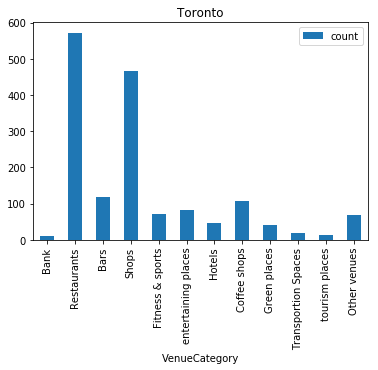

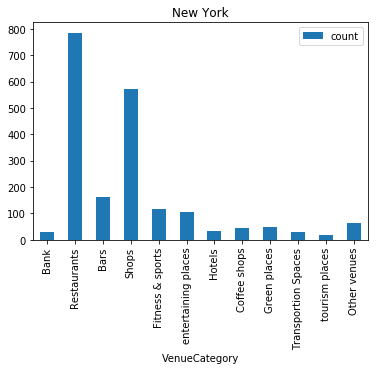

In [54]:
import matplotlib.pyplot as plt

ax = Toronto_final_counts.plot.bar(x='VenueCategory', y='count' , title='Toronto')
ax2 = new_york_final_counts.plot.bar(x='VenueCategory', y='count' , title='New York')

#new_york_final_counts.plot(ax=ax)

plt.show()

I tried clusering the neighborhoods according to the similarities between the venues each neighborhood contains using K-Means clusterning technique, but more than 90% of the neighborhoods was assigned to one cluster in a random way and no observations could be driven from these clusters.

So, I decided to group all the semilier veneus together for each city and compare between New York and Toronto according to these final numbers which generally describe the type or the characteristic of the city.

## Observations :

At first, lets consider the area of each city to help us compare between the characteristic of each city in a better way : 

    - New York total area = 783.8 km²
    - Toronto total area = 630.2 km²

New york is bigger than Toronto with about 150 Km^2. So, it is ordinary that New York would have more specific venues and the two cities would share the same characteristic according to that venues.

#### Coffee shops and entertaining places :

First clear observation for me is the number of coffee and tea shops in the two cities, It is mentioned that New York is bigger than Toronto and that would affect the number of all types of venues. But despite of that, Toronto has much more coffee shops than New York.

It can be observed that people in Toronto spend much time just sitting in coffee shops drinking some hot drinks and this leads to large number of that kind of shops.

And although the number of entertaining places would be near for both cites, it seams that people in New York use these places more often than people in Toronto who prefer coffee shops in their ordinary days.

#### Green places and transportation stations :

Number of green areas are so close in both cities, which means that Toronoto is more greener city than New York. This will lead to more transportation places (Bus stations, Metro Stations and Gas stations) in New York city.

##### Where to spend vacation? ( entertaining places - tourist attractions - Hotels) :

New York has much more entertaining and also tourism places, which makes it a better decision to spend your vacation in. But it would also be easier to stay in Toronto than New York because of its large number of hotels that would make it easier to find an available one.

#### Sports and Fitness :

New York has more sports and fitness places and also more different kinds of these places (if we display all kinds of venues categorized in sports and fitness places). These places including Gyms, Yoga studios, Spas, Boxing, Basketball, Tennis and Marial arts.

This variety make it easier for people live in New York to practice whatever the sport each one loves.

#### Other observations :

New York is more financial city than Toronoto according to the number of Banks.
Also we can see that Toronoto is famous for Brewery (11 Brewery in it and none in New York)

_______________

#### Finally, the observations above can be made so easily just by comparing few numbers between two cities. By knowing the nature of one city, it could be used as a reference to imagine the nature of any other cities just by comparing their veneues numbers with our reference.
#### Using the venues data of any city can make it easier to understand its characteristic and how it would looks like.

=================================================================================================